In [1]:
%matplotlib inline


# Within Session P300

This example shows how to perform a within session analysis on three different
P300 datasets.

We will compare two pipelines :

- Riemannian geometry
- XDAWN with Linear Discriminant Analysis

We will use the P300 paradigm, which uses the AUC as metric.


In [10]:
# Authors: Pedro Rodrigues <pedro.rodrigues01@gmail.com>
#
# License: BSD (3-clause)

import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import mne
from mne.decoding import Vectorizer
from pyriemann.estimation import Xdawn, XdawnCovariances
from pyriemann.tangentspace import TangentSpace
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline

import moabb
from moabb.datasets import DemonsP300
from moabb.datasets import BNCI2014_009
from moabb.evaluations import WithinSessionEvaluation
from moabb.paradigms import P300

getting rid of the warnings about the future



In [2]:
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

moabb.set_log_level("info")

## Create Pipelines

Pipelines must be a dict of sklearn pipeline transformer.



In [3]:
pipelines = {}


We have to do this because the classes are called 'Target' and 'NonTarget'
but the evaluation function uses a LabelEncoder, transforming them
to 0 and 1



In [4]:
labels_dict = {"Target": 1, "NonTarget": 0}

pipelines["RG+LDA"] = make_pipeline(
    XdawnCovariances(
        nfilter=2, classes=[labels_dict["Target"]], estimator="lwf", xdawn_estimator="scm"
    ),
    TangentSpace(),
    LDA(solver="lsqr", shrinkage="auto"),
)

pipelines["Xdw+LDA"] = make_pipeline(
    Xdawn(nfilter=2, estimator="scm"), Vectorizer(), LDA(solver="lsqr", shrinkage="auto")
)

## Evaluation

We define the paradigm (P300) and use all three datasets available for it.
The evaluation will return a DataFrame containing a single AUC score for
each subject / session of the dataset, and for each pipeline.

Results are saved into the database, so that if you add a new pipeline, it
will not run again the evaluation unless a parameter has changed. Results can
be overwritten if necessary.



In [5]:
paradigm = P300(resample=128)
print("charging dataset")
dataset = BNCI2014_009()
print(dataset.event_id)
dataset.subject_list = dataset.subject_list[:]
print(dataset.subject_list)
datasets = [dataset]
overwrite = True  # set to True if we want to overwrite cached results
evaluation = WithinSessionEvaluation(
    paradigm=paradigm, datasets=datasets, suffix="examples", overwrite=overwrite
)

results = evaluation.process(pipelines)

2023-11-10 11:02:04,772 INFO MainThread moabb.evaluations.base Processing dataset: BNCI2014-009


charging dataset
{'Target': 2, 'NonTarget': 1}
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


BNCI2014-009-WithinSession:   0%|          | 0/10 [00:00<?, ?it/s]

No hdf5_path provided, models will not be saved.


2023-11-10 11:02:12,988 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 1 | 0: Score 0.931


No hdf5_path provided, models will not be saved.


2023-11-10 11:02:18,611 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 1 | 0: Score 0.944


No hdf5_path provided, models will not be saved.


2023-11-10 11:02:24,679 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 1 | 1: Score 0.913


No hdf5_path provided, models will not be saved.


2023-11-10 11:02:30,405 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 1 | 1: Score 0.936


No hdf5_path provided, models will not be saved.


2023-11-10 11:02:36,410 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 1 | 2: Score 0.936


No hdf5_path provided, models will not be saved.


2023-11-10 11:02:42,013 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 1 | 2: Score 0.938
BNCI2014-009-WithinSession:  10%|█         | 1/10 [00:37<05:36, 37.33s/it]

No hdf5_path provided, models will not be saved.


2023-11-10 11:02:49,954 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 2 | 0: Score 0.934


No hdf5_path provided, models will not be saved.


2023-11-10 11:02:55,562 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 2 | 0: Score 0.950


No hdf5_path provided, models will not be saved.


2023-11-10 11:03:01,510 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 2 | 1: Score 0.910


No hdf5_path provided, models will not be saved.


2023-11-10 11:03:07,101 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 2 | 1: Score 0.954


No hdf5_path provided, models will not be saved.


2023-11-10 11:03:13,058 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 2 | 2: Score 0.941


No hdf5_path provided, models will not be saved.


2023-11-10 11:03:18,667 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 2 | 2: Score 0.939
BNCI2014-009-WithinSession:  20%|██        | 2/10 [01:13<04:55, 36.93s/it]

No hdf5_path provided, models will not be saved.


2023-11-10 11:03:26,748 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 3 | 0: Score 0.702


No hdf5_path provided, models will not be saved.


2023-11-10 11:03:32,324 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 3 | 0: Score 0.689


No hdf5_path provided, models will not be saved.


2023-11-10 11:03:38,254 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 3 | 1: Score 0.920


No hdf5_path provided, models will not be saved.


2023-11-10 11:03:43,831 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 3 | 1: Score 0.908


No hdf5_path provided, models will not be saved.


2023-11-10 11:03:49,769 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 3 | 2: Score 0.943


No hdf5_path provided, models will not be saved.


2023-11-10 11:03:55,389 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 3 | 2: Score 0.938
BNCI2014-009-WithinSession:  30%|███       | 3/10 [01:50<04:17, 36.84s/it]

No hdf5_path provided, models will not be saved.


2023-11-10 11:04:03,460 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 4 | 0: Score 0.937


No hdf5_path provided, models will not be saved.


2023-11-10 11:04:09,089 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 4 | 0: Score 0.949


No hdf5_path provided, models will not be saved.


2023-11-10 11:04:15,007 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 4 | 1: Score 0.930


No hdf5_path provided, models will not be saved.


2023-11-10 11:04:20,607 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 4 | 1: Score 0.940


No hdf5_path provided, models will not be saved.


2023-11-10 11:04:26,536 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 4 | 2: Score 0.921


No hdf5_path provided, models will not be saved.


2023-11-10 11:04:32,136 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 4 | 2: Score 0.945
BNCI2014-009-WithinSession:  40%|████      | 4/10 [02:27<03:40, 36.80s/it]

No hdf5_path provided, models will not be saved.


2023-11-10 11:04:39,999 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 5 | 0: Score 0.953


No hdf5_path provided, models will not be saved.


2023-11-10 11:04:45,597 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 5 | 0: Score 0.970


No hdf5_path provided, models will not be saved.


2023-11-10 11:04:51,485 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 5 | 1: Score 0.926


No hdf5_path provided, models will not be saved.


2023-11-10 11:04:57,095 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 5 | 1: Score 0.943


No hdf5_path provided, models will not be saved.


2023-11-10 11:05:03,075 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 5 | 2: Score 0.940


No hdf5_path provided, models will not be saved.


2023-11-10 11:05:08,676 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 5 | 2: Score 0.950
BNCI2014-009-WithinSession:  50%|█████     | 5/10 [03:03<03:03, 36.71s/it]

No hdf5_path provided, models will not be saved.


2023-11-10 11:05:16,559 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 6 | 0: Score 0.852


No hdf5_path provided, models will not be saved.


2023-11-10 11:05:22,155 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 6 | 0: Score 0.878


No hdf5_path provided, models will not be saved.


2023-11-10 11:05:28,084 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 6 | 1: Score 0.907


No hdf5_path provided, models will not be saved.


2023-11-10 11:05:33,703 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 6 | 1: Score 0.930


No hdf5_path provided, models will not be saved.


2023-11-10 11:05:39,644 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 6 | 2: Score 0.905


No hdf5_path provided, models will not be saved.


2023-11-10 11:05:45,242 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 6 | 2: Score 0.923
BNCI2014-009-WithinSession:  60%|██████    | 6/10 [03:40<02:26, 36.66s/it]

No hdf5_path provided, models will not be saved.


2023-11-10 11:05:53,167 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 7 | 0: Score 0.921


No hdf5_path provided, models will not be saved.


2023-11-10 11:05:58,823 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 7 | 0: Score 0.922


No hdf5_path provided, models will not be saved.


2023-11-10 11:06:04,814 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 7 | 1: Score 0.922


No hdf5_path provided, models will not be saved.


2023-11-10 11:06:10,415 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 7 | 1: Score 0.915


No hdf5_path provided, models will not be saved.


2023-11-10 11:06:16,323 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 7 | 2: Score 0.841


No hdf5_path provided, models will not be saved.


2023-11-10 11:06:21,923 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 7 | 2: Score 0.859
BNCI2014-009-WithinSession:  70%|███████   | 7/10 [04:17<01:49, 36.67s/it]Downloading data from 'http://bnci-horizon-2020.eu/database/data-sets/009-2014/A08S.mat' to file 'C:\Users\velut\mne_data_test\MNE-bnci-data\database\data-sets\009-2014\A08S.mat'.
c:\Users\velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lampx.tugraz.at'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
100%|#####################################| 18.5M/18.5M [00:00<00:00, 18.5GB/s]
SHA256 hash of downloaded file: c1e9716f0c48cc78b59892a2ca6e707f66ce8c054da499f43298768e5270074b
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downlo

No hdf5_path provided, models will not be saved.


2023-11-10 11:06:30,210 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 8 | 0: Score 0.909


No hdf5_path provided, models will not be saved.


2023-11-10 11:06:35,846 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 8 | 0: Score 0.915


No hdf5_path provided, models will not be saved.


2023-11-10 11:06:41,863 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 8 | 1: Score 0.849


No hdf5_path provided, models will not be saved.


2023-11-10 11:06:47,508 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 8 | 1: Score 0.889


No hdf5_path provided, models will not be saved.


2023-11-10 11:06:53,450 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 8 | 2: Score 0.827


No hdf5_path provided, models will not be saved.


2023-11-10 11:06:59,061 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 8 | 2: Score 0.862
BNCI2014-009-WithinSession:  80%|████████  | 8/10 [04:54<01:13, 36.82s/it]Downloading data from 'http://bnci-horizon-2020.eu/database/data-sets/009-2014/A09S.mat' to file 'C:\Users\velut\mne_data_test\MNE-bnci-data\database\data-sets\009-2014\A09S.mat'.
c:\Users\velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lampx.tugraz.at'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
100%|#####################################| 18.5M/18.5M [00:00<00:00, 18.5GB/s]
SHA256 hash of downloaded file: c760087eac882541b2a67fc7d0a2cd698eb9ee469687c8fa2e59ed3d10ba4d48
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downlo

No hdf5_path provided, models will not be saved.


2023-11-10 11:07:07,441 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 9 | 0: Score 0.967


No hdf5_path provided, models will not be saved.


2023-11-10 11:07:13,071 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 9 | 0: Score 0.969


No hdf5_path provided, models will not be saved.


2023-11-10 11:07:19,002 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 9 | 1: Score 0.943


No hdf5_path provided, models will not be saved.


2023-11-10 11:07:24,608 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 9 | 1: Score 0.966


No hdf5_path provided, models will not be saved.


2023-11-10 11:07:30,677 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 9 | 2: Score 0.904


No hdf5_path provided, models will not be saved.


2023-11-10 11:07:36,324 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 9 | 2: Score 0.949
BNCI2014-009-WithinSession:  90%|█████████ | 9/10 [05:31<00:36, 36.96s/it]Downloading data from 'http://bnci-horizon-2020.eu/database/data-sets/009-2014/A10S.mat' to file 'C:\Users\velut\mne_data_test\MNE-bnci-data\database\data-sets\009-2014\A10S.mat'.
c:\Users\velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lampx.tugraz.at'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
100%|#####################################| 18.5M/18.5M [00:00<00:00, 9.26GB/s]
SHA256 hash of downloaded file: 22361acbc546e7f0f1ef7af7789088068df1bb37bd51f00b4786975c544ddc5e
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downlo

No hdf5_path provided, models will not be saved.


2023-11-10 11:07:44,717 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 10 | 0: Score 0.981


No hdf5_path provided, models will not be saved.


2023-11-10 11:07:50,360 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 10 | 0: Score 0.985


No hdf5_path provided, models will not be saved.


2023-11-10 11:07:56,349 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 10 | 1: Score 0.965


No hdf5_path provided, models will not be saved.


2023-11-10 11:08:01,962 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 10 | 1: Score 0.970


No hdf5_path provided, models will not be saved.


2023-11-10 11:08:07,962 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 10 | 2: Score 0.963


No hdf5_path provided, models will not be saved.


2023-11-10 11:08:13,559 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 10 | 2: Score 0.965
BNCI2014-009-WithinSession: 100%|██████████| 10/10 [06:08<00:00, 36.89s/it]


## Plot Results

Here we plot the results to compare the two pipelines



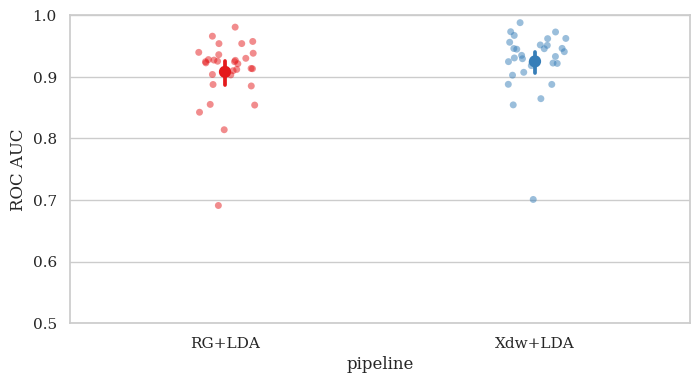

In [6]:
fig, ax = plt.subplots(facecolor="white", figsize=[8, 4])

sns.stripplot(
    data=results,
    y="score",
    x="pipeline",
    ax=ax,
    jitter=True,
    alpha=0.5,
    zorder=1,
    palette="Set1",
)
sns.pointplot(data=results, y="score", x="pipeline", ax=ax, palette="Set1")

ax.set_ylabel("ROC AUC")
ax.set_ylim(0.5, 1)

plt.show()

# Other test 

In [12]:
sessions = dataset.get_data()
print(sessions)

subject = 1
session_name = "0"
run_name = "0"
raw = sessions[subject][session_name][run_name]

print(raw)

{1: {'0': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '1': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '2': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}}, 2: {'0': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '1': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '2': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}}, 3: {'0': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '1': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '2': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}}, 4: {'0': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '1': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '2': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}}, 5: {'0': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '1': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '2': {'0'

In [18]:
events = mne.find_events(raw,consecutive=True)
print(events)

[[ 1544     0     1]
 [ 1544     0     3]
 [ 1608     0     7]
 ...
 [48520     0    11]
 [48584     0     1]
 [48584     0    14]]
